In [1]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import  mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[1])

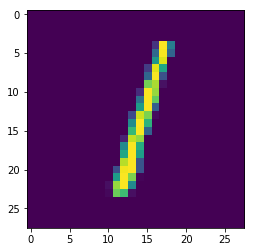

In [6]:
plt.imshow(x_test[2])

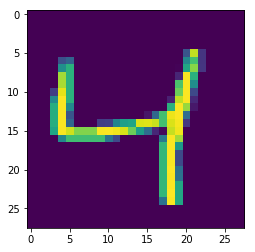

In [7]:
plt.imshow(x_train[2].reshape(28,28))

In [0]:
def create_generator():
    
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100))
    generator.add(ReLU())
    
    generator.add(Dense(units = 512))
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024))
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation ="tanh"))
    
    generator.compile(loss="binary_crossentropy",
                     optimizer=Adam(lr=0.0001, beta_1=0.5))
    return generator

In [9]:
g = create_generator()
g.summary()

W0829 12:35:47.571351 140600295688064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 12:35:47.609991 140600295688064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 12:35:47.617081 140600295688064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 12:35:47.684884 140600295688064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 12:35:47.691832 140600295688064 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_2 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [0]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units=1, activation="sigmoid"))
    
    discriminator.compile(loss="binary_crossentropy",
                         optimizer = Adam(lr=0.0001, beta_1 = 0.5))
    return discriminator
                          

In [11]:
d=create_discriminator()
d.summary()

W0829 12:35:52.492655 140600295688064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0829 12:35:52.505102 140600295688064 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

In [0]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss="binary_crossentropy", optimizer="adam")
    return gan

In [13]:
gan = create_gan(d, g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
epochs = 50
batch_size = 256

In [15]:
for e in range(epochs):
    for _ in range(batch_size):
        
        noise = np.random.normal(0,1, [batch_size,100])
        
        generated_images = g.predict(noise)
        
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]
        
        x = np.concatenate([image_batch, generated_images])
        
        y_dis = np.zeros(batch_size * 2)
        
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x, y_dis)
        
        noise = np.random.normal(0,1, [batch_size,100])
        
        y_gen = np.ones(batch_size)
        
        d.trainable = False
        
        gan.train_on_batch(noise, y_gen)
        
    print("Epochs: ", e)

Epochs:  0
Epochs:  1
Epochs:  2
Epochs:  3
Epochs:  4
Epochs:  5
Epochs:  6
Epochs:  7
Epochs:  8
Epochs:  9
Epochs:  10
Epochs:  11
Epochs:  12
Epochs:  13
Epochs:  14
Epochs:  15
Epochs:  16
Epochs:  17
Epochs:  18
Epochs:  19
Epochs:  20
Epochs:  21
Epochs:  22
Epochs:  23
Epochs:  24
Epochs:  25
Epochs:  26
Epochs:  27
Epochs:  28
Epochs:  29
Epochs:  30
Epochs:  31
Epochs:  32
Epochs:  33
Epochs:  34
Epochs:  35
Epochs:  36
Epochs:  37
Epochs:  38
Epochs:  39
Epochs:  40
Epochs:  41
Epochs:  42
Epochs:  43
Epochs:  44
Epochs:  45
Epochs:  46
Epochs:  47
Epochs:  48
Epochs:  49


In [0]:
g.save_weights('gans_model.h5')

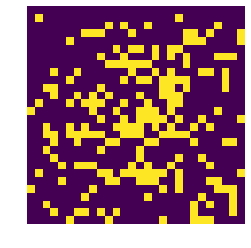

In [21]:
noise = np.random.normal(loc = 0, scale = 1, size = [100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[0], interpolation = 'nearest')
plt.axis('off')
plt.show()

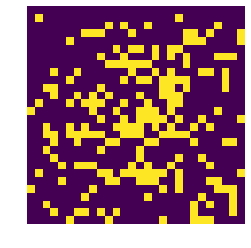

In [22]:
noise = np.random.normal(loc = 0, scale = 1, size = [100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[5], interpolation = 'nearest')
plt.axis('off')
plt.show()